1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [55]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

l = 6.3
prob = 1 - scipy.stats.poisson.cdf(15, l)
print("Probability of observing 15 or more hurricanes in a single year: ", prob)

Z = (15-l)/np.sqrt(l)
print('\nThe Z values is: ', Z)

pvalue = scipy.stats.norm.cdf(-Z) + (1. - scipy.stats.norm.cdf(Z))
print('The p-value is: ', pvalue)

print('\nSince the level fo significance ( 0.022 ) is much higher than the p-value (',pvalue,') then the number of hurricanes in 2005 is significatly larger ')

Probability of observing 15 or more hurricanes in a single year:  0.0008444930803583883

The Z values is:  3.4661629670697414
The p-value is:  0.0005279431738299246

Since the level fo significance ( 0.022 ) is much higher than the p-value ( 0.0005279431738299246 ) then the number of hurricanes in 2005 is significatly larger 


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [301]:
import numpy as np
import scipy

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n=10

avg_pre = np.mean(pre)
avg_post = np.mean(post)

sigma = np.sqrt( ( np.var(pre,ddof=1)+(np.var(post,ddof=1) ) )/2 )

T = (avg_pre - avg_post)/(sigma*np.sqrt(2/10))
print('The T-value is: ', T)

pvalue = scipy.stats.t.cdf(T, n - 1) + (1. - scipy.stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

print('\nSince the level fo significance ( 0.05 ) is much higher than the p-value (',pvalue,') then the change in the blood pressure is statistically significant') 

The T-value is:  -3.786997938137629
p-value = 0.0043024641328646045

Since the level fo significance ( 0.05 ) is much higher than the p-value ( 0.0043024641328646045 ) then the change in the blood pressure is statistically significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

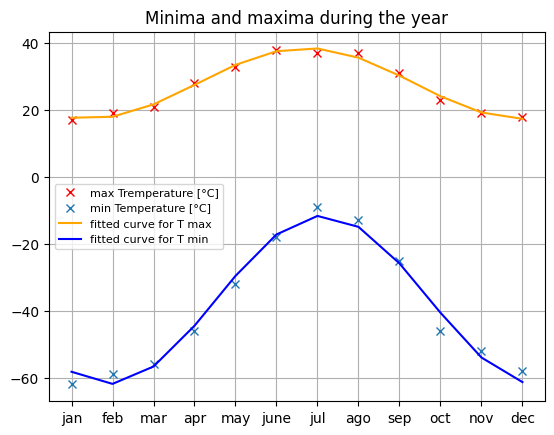

In [152]:
from scipy import optimize

max_t = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
plt.plot(months, max_t, marker='x', linestyle='None', color='red', label='max Tremperature [°C]')
plt.plot(months, min_t, marker='x', linestyle='None', label='min Temperature [°C]')
plt.grid()
plt.title('Minima and maxima during the year')

def f(x, a, b, c, d):
    return a*np.sin(b*(x-c)) + d

x = np.array([i for i in range(12)])

popt1, pcov1 = optimize.curve_fit(f, x, max_t, p0=[10, 0, 4, 30])
plt.plot(x, f1(x, *popt1), color='orange', label='fitted curve for T max')

popt2, pcov2 = optimize.curve_fit(f, x, min_t, p0=[35, 1, 1, -37])
plt.plot(x, f(x, *popt2), color='blue', label='fitted curve for T min')
plt.legend(fontsize=8)
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Uncertainities: 
 [ 5.65685425  6.40312424  6.92820323  8.          9.43398113 11.61895004
 13.74772708 16.52271164 32.66496594 71.84705979 54.56189146 21.14237451
 11.95826074  8.1240384   5.56776436  3.46410162  3.          2.
  1.41421356  1.73205081]


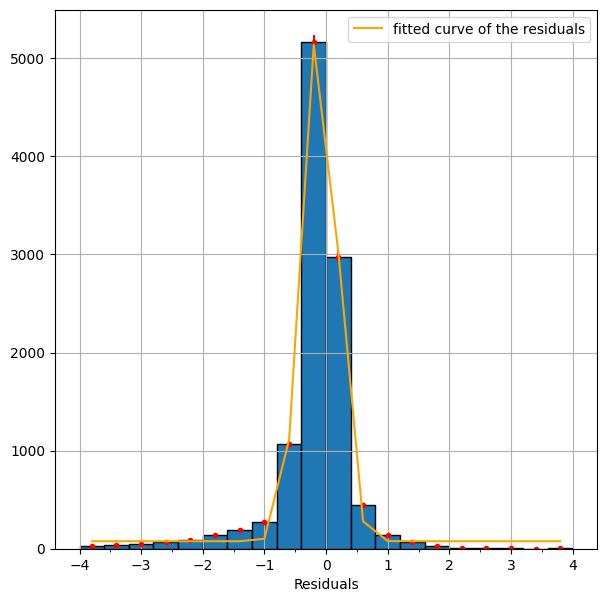

X^2-value =  1067.9978086938402
p-value =  0.0
Since p is zero, the fit proposed is not appropiate to describe data


In [328]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import numpy as np
import pandas as pd
import pickle
from matplotlib.ticker import MultipleLocator
from scipy import optimize

filename = 'data/residuals_261.pkl'
input_file = open(filename, 'rb')
data = pickle.load(input_file)
input_file.close()

dictionary = data[()]
residuals = dictionary['residuals']


df = pd.DataFrame(dictionary)
display(df)


fig = plt.figure(figsize=(7,7))
nbins = 20
the_range = (-4,4)
h, bins, _ = plt.hist(residuals, bins = nbins, range=the_range, edgecolor='black')
plt.grid()


uncertainity = np.sqrt(h)
bin_center = 0.5*(bins[:-1] + bins[1:])
plt.errorbar(bin_center, h, yerr=uncertainity, fmt='r.', ecolor='red', barsabove='True')
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.5))
plt.xlabel('Residuals')
print('Uncertainities: \n',uncertainity)


def f(x, a, b, c, d):
    return a * np.exp(-(x - b)**2 / (2 * c**2)) + d

popt, pcov = optimize.curve_fit(f, bin_center, h, p0=[1,1,1,0])
plt.plot(bin_center, f(bin_center, *popt), color='orange', label='fitted curve of the residuals')
plt.legend()
plt.show()


sigma_y = np.sqrt(np.abs(h))
chi_squared = np.sum((h - f(bin_center, *popt))**2 / f(bin_center, *popt))
ndof = nbins - 1
pvalue = 1. - scipy.stats.chi2.cdf(chi_squared, ndof)
print('X^2-value = ', chi_squared)
print('p-value = ', pvalue)

print('Since p is zero, the fit proposed is not appropiate to describe data')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

,Date,Temperature
0,2008.00274,-2.94444
1,2008.00548,-2.66667
2,2008.00821,-2.66667
3,2008.01095,-2.00000
4,2008.01369,-1.94444
...,...,...
1821,2012.98836,6.88889
1822,2012.99110,7.05556
1823,2012.99384,3.77778
1824,2012.99658,1.83333


The best parameter and their uncertainities are: 
a  ---->  9.997257122215196  +-  0.12185012641542982
b  ---->  2.899661850391556  +-  0.012198607404495368
c  ---->  9.253976706792827  +-  0.08619720191354863

The average temperature in Monaco is  9.254051149780702 °C

The predicted temperature in the hottest period of the year is around :  19.251089395943406 °C
The predicted temperature in the coldest period of the year is:  -0.7432744075891247 °C

The parameter "b" determines the intial phase of the cosine function. Since it determines a shift in time of the cosine, it allows a better fitting of the data


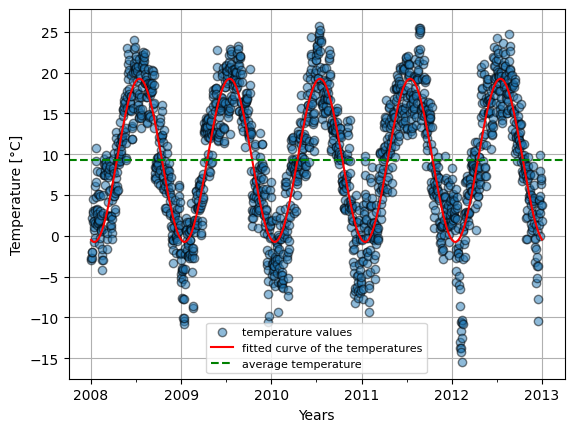

In [519]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.ticker import MultipleLocator

#!cat munich_temperatures_average_with_bad_data.txt

df = pd.read_csv(filename, delimiter=' ', names=['Date', 'Temperature'])
#display(df)

start = float(2008.00274)
end = float(2012.99932)

for i in range(len(df)):
    if df.iloc[i,0] == start:
        index_start = i
    if df.iloc[i,0] == end:
        index_end = i

#print(index_start)
#print(index_end)

subset = df.iloc[index_start:index_end+1, :]
subset = subset.reset_index()
subset = subset.drop('index', axis=1)
display(subset)

dates = subset['Date']
temperatures = subset['Temperature']

#I remove 2 wrong data from the set (temperature = 99 °C) 
#print(np.argmax(temperatures))
subset = subset.drop(267)
temperatures = np.delete(temperatures, 267)
dates = np.delete(dates, 267)

#print(np.argmax(temperatures))
subset = subset.drop(463)
temperatures = np.delete(temperatures, 463)
dates = np.delete(dates, 463)

plt.plot(dates, temperatures, 'o', alpha=0.5, markeredgecolor='black', label='temperature values')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature [°C]')

def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

popt, pcov = optimize.curve_fit(f, dates, temperatures, p0=[10,1,10])
plt.plot(dates, f(dates, *popt), color='red', label='fitted curve of the temperatures')


unc = np.sqrt(np.diag(pcov))
letters = ['a', 'b', 'c']
print('The best parameter and their uncertainities are: ',)
for i in range(len(letters)):
    print(letters[i], ' ----> ', popt[i], ' +- ', unc[i])
    

avg = np.mean(temperatures)
print('\nThe average temperature in Monaco is ', avg, '°C')
plt.axhline(y=avg, color='green', linestyle='--', label='average temperature')

plt.legend(fontsize=8)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.5))
plt.gca().yaxis.set_major_locator(MultipleLocator(5))

print('\nThe predicted temperature in the hottest period of the year is around : ', np.max(f(dates, *popt)), '°C')
print('The predicted temperature in the coldest period of the year is: ', np.min(f(dates, *popt)), '°C')

print('\nThe parameter "b" determines the intial phase of the cosine function. Since it determines a shift in time of the cosine, it allows a better fitting of the data' )

plt.show()